# Codici di correzione degli errori

Daniele Scaffai (5658260), Lorenzo Livio Vaccarecci (5462843)

In [51]:
import random
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, AncillaRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

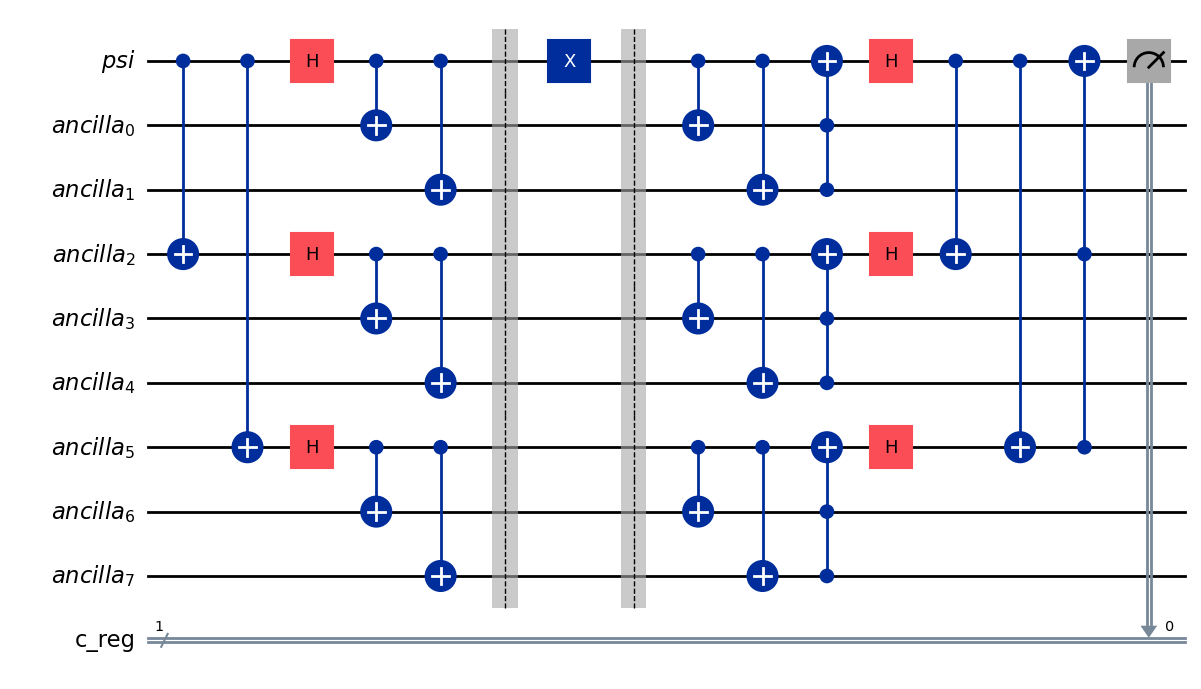

In [52]:
psi = QuantumRegister(1, 'psi')
ancilla = AncillaRegister(8, 'ancilla')
c_reg = ClassicalRegister(1, 'c_reg')

qc = QuantumCircuit(psi, ancilla, c_reg)

qc.cx(psi[0],ancilla[2])
qc.cx(psi[0],ancilla[5])

qc.h(psi[0])
qc.h(ancilla[2])
qc.h(ancilla[5])

qc.cx(psi[0],ancilla[0])
qc.cx(ancilla[2],ancilla[3])
qc.cx(ancilla[5],ancilla[6])

qc.cx(psi[0],ancilla[1])
qc.cx(ancilla[2],ancilla[4])
qc.cx(ancilla[5],ancilla[7])

qc.barrier()
qc.x(psi[0])
qc.barrier()

qc.cx(psi[0],ancilla[0])
qc.cx(ancilla[2],ancilla[3])
qc.cx(ancilla[5],ancilla[6])

qc.cx(psi[0],ancilla[1])
qc.cx(ancilla[2],ancilla[4])
qc.cx(ancilla[5],ancilla[7])

qc.ccx(ancilla[1],ancilla[0],psi[0])
qc.ccx(ancilla[4],ancilla[3],ancilla[2])
qc.ccx(ancilla[7],ancilla[6],ancilla[5])

qc.h(psi[0])
qc.h(ancilla[2])
qc.h(ancilla[5])

qc.cx(psi[0],ancilla[2])
qc.cx(psi[0],ancilla[5])
qc.ccx(ancilla[5],ancilla[2],psi[0])

qc.measure(psi[0], c_reg[0])

qc.draw(output='mpl')

{'0': 2048}


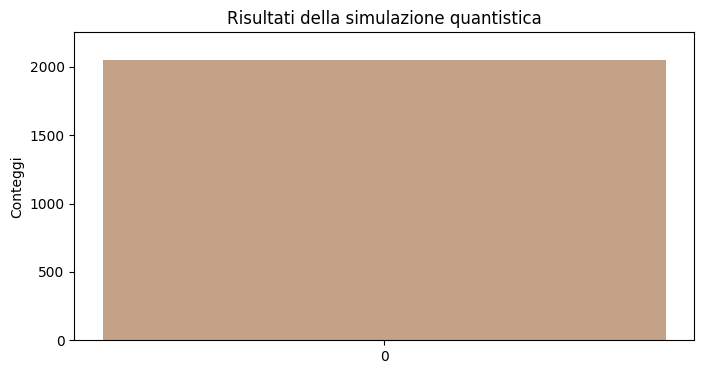

In [53]:
simulator = AerSimulator()

job = simulator.run(qc, shots=2048)
result = job.result()

counts = result.get_counts(qc)
print(counts)

labels = list(counts.keys())
values = list(counts.values())

fig, ax = plt.subplots(figsize=(8, 4))

bars = ax.bar(labels, values, color='#c4a287')

ax.set_ylabel('Conteggi')
ax.set_title('Risultati della simulazione quantistica')
ax.set_ylim(0, max(values) * 1.1)

plt.show()